![bse_logo_textminingcourse](https://bse.eu/sites/default/files/bse_logo_small.png)

# Part 1: Getting the main text data


## 0. Packages

In [ ]:
# Text Processing Libraries
import re  # Regular expressions
import nltk  # Natural Language Toolkit
import spacy  # Advanced NLP processing



# Stemming and Lemmatization
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer

# Tokenization and Stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Machine Learning & Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Dateframes and file reading
import pandas as pd
import os

# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)


True

## 1. Mental Health Corpus

The Mental Health Corpus is a dataset containing texts related to anxiety, depression, and other mental health issues. It includes user comments labeled as either poisonous or not, making it useful for sentiment analysis, toxic language detection, and mental health research. (Mental Health Corpus, n.d.). Retrieved from Kaggle: https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus.

The data is allocated in a *mental_health.csv* contains two columns:
| Column Name | Description|
|-------------|------------|
|text| The user-generated comments| 
|label| Binary classification: 1 means considered as a comment which is poisonous with mental health issues, and 0 means not considered|

### File Load

In [ ]:
# Define the path where the CSV files are located
csv_directory = os.path.join(os.getcwd(), "files", "general_results")
df = pd.read_csv("data/mental_health.csv")
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In this step, we are filtering the dataset based on the label column to separate the two classes:



In [ ]:
df_filtered_0 = df[df["label"] == 0]  # Extract all rows where label == 0 (Non-Toxic)
df_filtered_1 = df[df["label"] == 1]  # Extract all rows where label == 1 (Toxic)

df_filtered_0.head()
df_filtered_1.head()

,text,label
1,nothing look forward lifei dont many reasons k...,1
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
7,deserve liveif died right noone would carei re...,1


* **df_filtered_0** now contains only the comments labeled as "0", meaning they are non-toxic.
* **df_filtered_1** now contains only the comments labeled as "1", meaning they are toxic or distressing

## 2. Pre-processing

The text data is cleaned and prepared by removing stopwords, tokenizing, and applying stemming and lemmatization to standardize word forms. Below some functions are defined to achieve this goal.

In [ ]:
# Load spaCy model
sp = spacy.load("en_core_web_sm")

# Load previous preprocessing functions
porter=SnowballStemmer("english")
lmtzr = WordNetLemmatizer()

STOP_WORDS = set(stopwords.words('english'))

# Custom stop words related to mental health
custom_stopwords = {
}
STOP_WORDS.update(custom_stopwords)


def preprocess_lower(text):
    
    # Lowercase the text
    text_lower = text.lower()

    # Remove punctuation (everything except word characters and whitespace)
    text_no_punct = re.sub(r'[^\w\s]', '', text_lower)

    # Tokenize the cleaned text.
    tokens = word_tokenize(text_no_punct)

    # Filter out stopwords.
    filtered_tokens = [token for token in tokens if token not in STOP_WORDS]

    return " ".join(filtered_tokens)


def preprocess_stem(text):

    # Get the cleaned lowercased and stopwords-removed tokens.
    joined_tokens = preprocess_lower(text)
    
    tokens=word_tokenize(joined_tokens)

    # Initialize the Porter Stemmer.
    ps = PorterStemmer()

    # Stem each token.
    stemmed_tokens = [ps.stem(token) for token in tokens]

    return " ".join(stemmed_tokens)


def preprocess_lemma(text):

    # Process text using spaCy
    doc = sp(text)

    # Extract the lemma of each token, filtering out tokens flagged as punctuation or stopwords.
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_.strip() != '']

    return " ".join(lemmatized_tokens)


def tokenize(text, mode=0):

    if mode == 0:
        return preprocess_lower(text)
    elif mode == 1:
        return preprocess_stem(text)
    elif mode == 2:
        return preprocess_lemma(text)
    else:
        raise ValueError("Invalid mode. Please use 0 for lowercasing, 1 for stemming, or 2 for lemmatizing.")

Applying preprocessing functions to text field in dataframe. The results of each step are saved in a new column. Lematization and stemming are separate processes from stop word removal.  Later it will be decided whether to proceed with the lemmatized text or the stemmed text.

In [16]:
# Apply preprocessing functions to the DataFrame
df['text_no_stopwords'] = df['text'].apply(lambda x: preprocess_lower(x) if pd.notna(x) else "")
df['text_stem'] = df['text_no_stopwords'].apply(lambda x: preprocess_stem(x) if pd.notna(x) else "")
df['text_lemma'] = df['text_no_stopwords'].apply(lambda x: preprocess_lemma(x) if pd.notna(x) else "")
df

,text,label,text_no_stopwords,text_stem,text_lemma
0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...,dear american teen question dutch person heard...,dear american teen question dutch person hear ...
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...,noth look forward lifei dont mani reason keep ...,look forward lifei not reason going feel like ...
2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...,music recommend im look expand playlist usual ...,music recommendation m look expand playlist us...
3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...,im done tri feel betterth reason im still aliv...,m try feel betterthe reason m alive know mum d...
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...,worri year old girl subject domest physicalmen...,worry year old girl subject domestic physicalm...
...,...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,posting everyday people stop caring religion m...,post everyday peopl stop care religion matter ...,post everyday people stop care religion matter...
27973,okay definetly need hear guys opinion ive pret...,0,okay definetly need hear guys opinion ive pret...,okay definetli need hear guy opinion ive prett...,okay definetly need hear guy opinion ve pretty...
27974,cant get dog think ill kill myselfthe last thi...,1,cant get dog think ill kill myselfthe last thi...,cant get dog think ill kill myselfth last thin...,not dog think ill kill myselfthe thing m hold ...
27975,whats point princess bridei really think like ...,1,whats point princess bridei really think like ...,what point princess bridei realli think like w...,s point princess bridei think like wesley say ...


### 2.1. World Clouds

Word clouds are generated for each class to visualize the most frequent words and the impact of each preprocessing step on discovering mental health-related text.

In [ ]:
# Define a function to generate word clouds for each class
def generate_wordclouds(df, text_column):
    label_corpus = {}
    
    # Iterate through each unique class in the dataset
    for label in df['label'].unique():
        # Filter descriptions by label
        text_corpus = " ".join(df[df['label'] == label][text_column].dropna())
        
        # Store the processed text in the dictionary
        label_corpus[label] = text_corpus
    
    # Generate and display word clouds side by side
    num_label = len(label_corpus)
    fig, axes = plt.subplots(1, num_label, figsize=(10 * num_label, 5))
    
    if num_label == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one class
    
    for ax, (label, text) in zip(axes, label_corpus.items()):
        if text.strip():  # Ensure the text is not empty
            wordcloud = WordCloud(
                width=800, 
                height=400, 
                background_color='white', 
                colormap='viridis', 
                max_words=100
            ).generate(text)
            
            # Display the word cloud
            ax.imshow(wordcloud, interpolation="bilinear")
            ax.axis("off")  # Remove axes
            ax.set_title(f"Word Cloud for {label}")
    
    plt.show()

### 2.1.1 World Cloud Before Pre-Processing

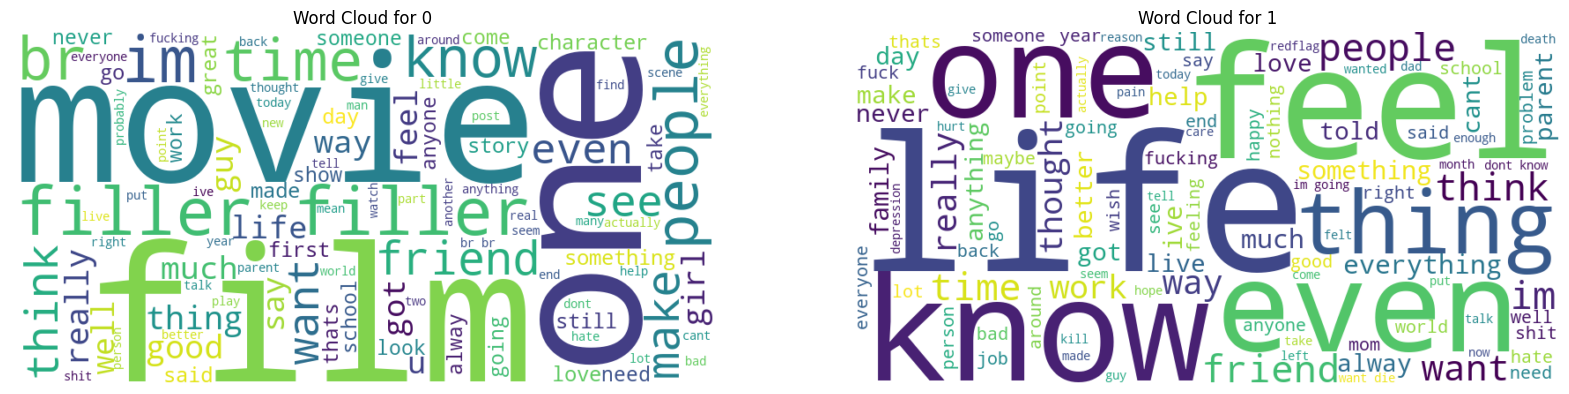

In [18]:
# Generate word clouds before pre-processing
generate_wordclouds(df, 'text')

### 2.1.2 Word clouds After Stopwords Removal

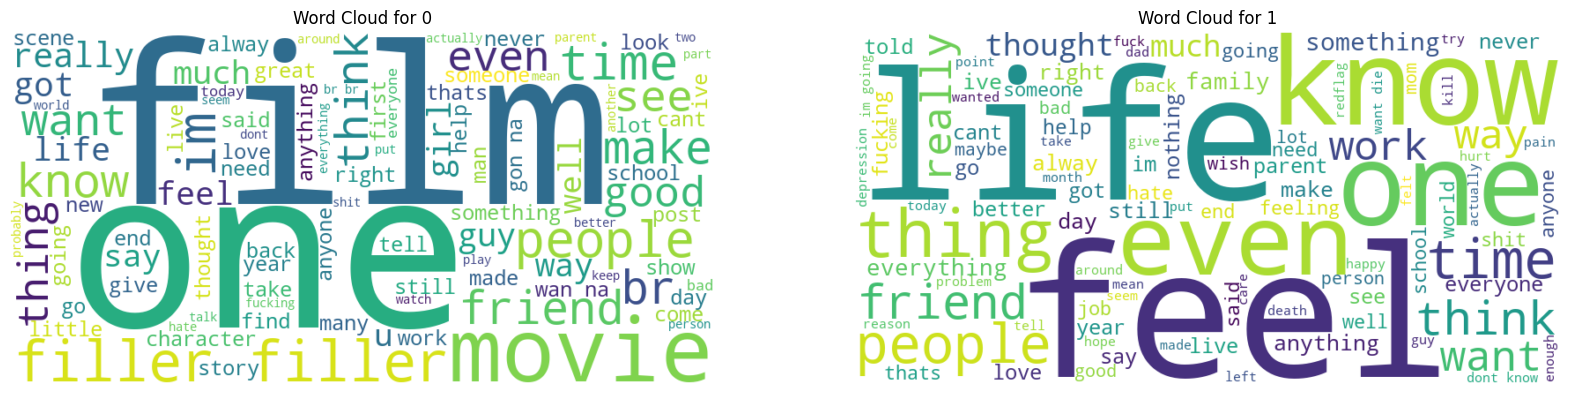

In [19]:
# Generate word clouds after stop word removal
generate_wordclouds(df, 'text_no_stopwords')

### 2.1.3 World Cloud after Stemming

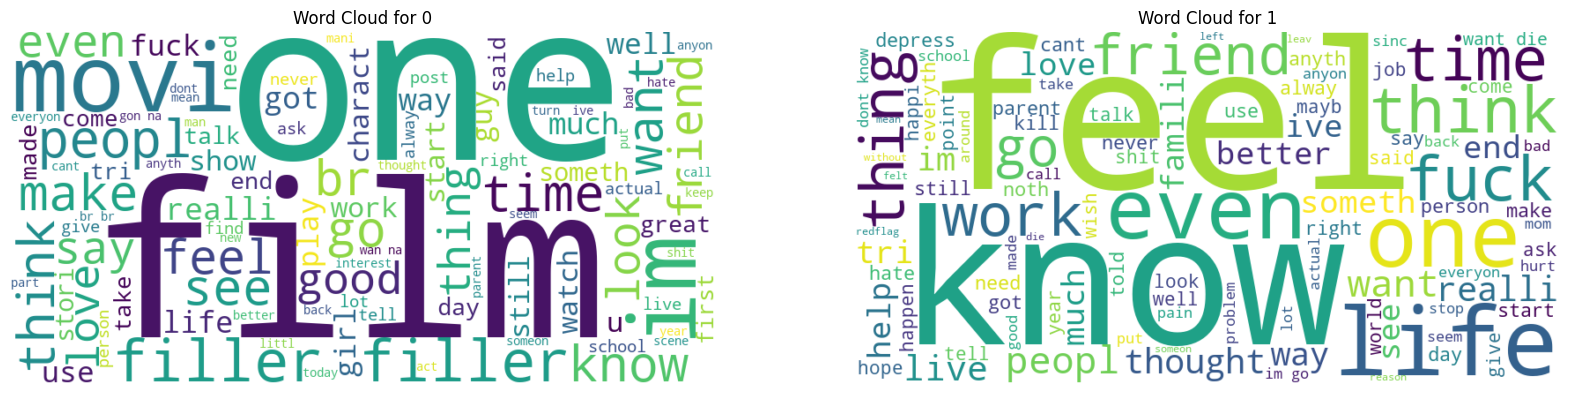

In [20]:
# Generate word clouds after stem
generate_wordclouds(df, 'text_stem')

### 2.1.4 World Cloud after Lemmatization

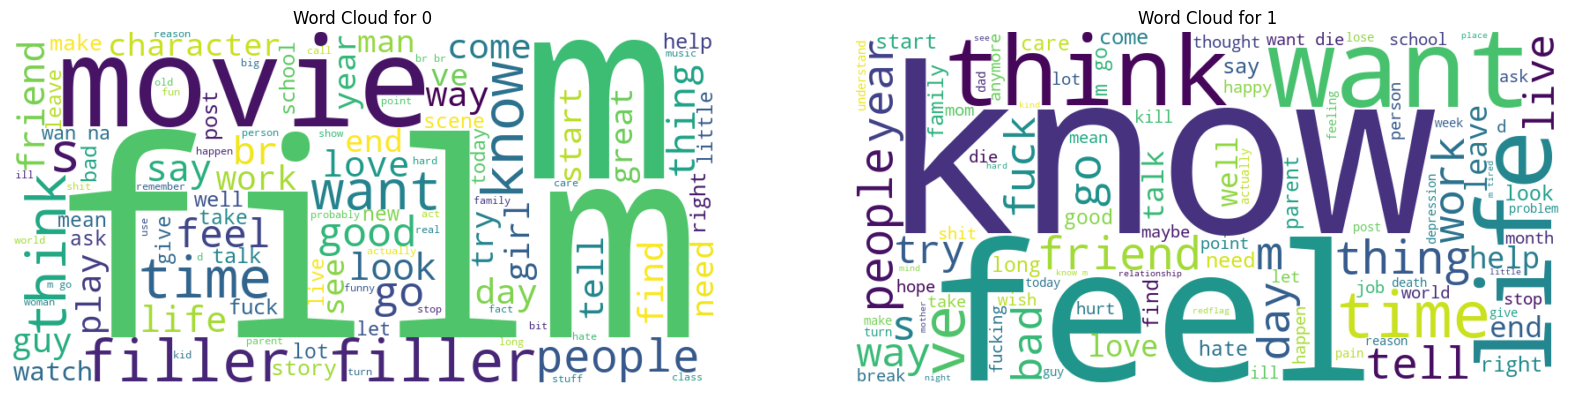

In [21]:
# Generate word clouds after lemma
generate_wordclouds(df, 'text_lemma')

### Export Results

The preprocessed text is saved in a CSV file for subsequent steps.  This is necessary because the preprocessing itself requires approximately 10 minutes.

In [22]:
df.to_csv("data/preprocessing/mental_health_preprocessed.csv")